# Klasifikasi Jenis Kopra dengan Konsep Machine Learning dan Ensembel Learning

Kontribusi Riset
- Pembagian data = 80% dan 20%, 90% dan 10%
- Ektrasi Fitur = Warna, Bentuk, Tesktur
- Metode Klasifikasi = KNN, SVM, DT, RF, NB, LR, LDA, QDA
- Metode Ensambel Learning = Votting, Bagging, Stacking, AdaBoost

In [1]:
from ipynb.fs.full.akuisisi_data import *

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean-R           1839 non-null   float64
 1   Mean-G           1839 non-null   float64
 2   Mean-B           1839 non-null   float64
 3   Mean-H           1839 non-null   float64
 4   Mean-V           1839 non-null   float64
 5   Mean-S           1839 non-null   float64
 6   Mean-Gray        1839 non-null   float64
 7   Standar-Deviasi  1839 non-null   float64
 8   Luas             1839 non-null   float64
 9   Perimeter        1839 non-null   float64
 10  Contrast         1839 non-null   float64
 11  Dissimilarity    1839 non-null   float64
 12  Homogeneity      1839 non-null   float64
 13  Energy           1839 non-null   float64
 14  Correlation      1839 non-null   float64
 15  Jenis Kopra      1839 non-null   int64  
dtypes: float64(15), int64(1)
memory usage: 230.0 KB


## 3. Praproses Data

- Setting experiment

In [2]:
# 1. skenario W
print("Percobaan 1")
x = dataset.iloc[:,0:8].values

# # 2. skenario B
# print("Percobaan 2")
# x = dataset.iloc[:,8:10].values

# # 3. skenario T
# print("Percobaan 3")
# x = dataset.iloc[:,10:15].values

# # 4. Skenario W dan B
# print("Percobaan 4")
# x = dataset.iloc[:,0:10].values

# # 5. Skenario W dan T
# print("Percobaan 5")
# x = dataset.iloc[:,0:13].values

# # 6. Skenario B dan T
# print("Percobaan 6")
# x = dataset.iloc[:,8:15].values

# # 7. Skenario W,B,dan T
# print("Percobaan 7")
# x = dataset.iloc[:,0:15].values

# Taget, Jenis Kopra
y = dataset.iloc[:,[-1]].values
y = y.reshape(len(y))

Percobaan 1


In [3]:
# feature
np.round(x[:5],4)

array([[ 99.7735,  85.2993,  72.5793,  11.272 ,  99.7906,  51.0244,
         88.1944,  54.5893],
       [114.1627, 110.4249,  91.1458,  19.0044, 114.8282,  36.8718,
        109.3581,  79.9393],
       [ 86.7587,  77.0958,  58.2202,  14.3739,  86.7604,  58.7899,
         77.8335,  52.0851],
       [ 80.3976,  71.1794,  55.9146,  12.9194,  80.3995,  52.5784,
         72.2365,  52.3093],
       [ 98.9635,  89.047 ,  68.0217,  14.3642,  98.9674,  56.0236,
         89.6345,  63.7584]])

In [4]:
# label
np.round(y[:-1])

array([1, 1, 1, ..., 3, 3, 3], dtype=int64)

- Normalisasi MinMax

In [5]:
# normalize features
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
np.round(x[:5],4)

array([[0.6636, 0.6414, 0.6765, 0.0835, 0.6637, 0.2913, 0.6519, 0.4846],
       [0.8016, 0.8869, 0.8975, 0.1631, 0.8079, 0.1625, 0.8618, 0.8451],
       [0.5388, 0.5613, 0.5056, 0.1155, 0.5388, 0.362 , 0.5491, 0.449 ],
       [0.4778, 0.5034, 0.4782, 0.1005, 0.4778, 0.3054, 0.4936, 0.4522],
       [0.6558, 0.678 , 0.6223, 0.1154, 0.6558, 0.3368, 0.6662, 0.615 ]])

- Split Data Testing dan Data Training

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, train_size=0.9, random_state=0)

## 4. Konsep Supervised Learning

In [8]:
# 1. KNN
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1, metric='euclidean').fit(x_train,y_train).predict(x_test)

# 2. SVM
svm = SVC(kernel='rbf', random_state=1234).fit(x_train,y_train).predict(x_test)

# 3. C45
c45 = DecisionTreeClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

# 4. RF
rf = RandomForestClassifier(criterion="gini", random_state=1234).fit(x_train,y_train).predict(x_test)

# 5. NB
nb = GaussianNB().fit(x_train,y_train).predict(x_test)

# 6. LR
lr = LogisticRegression(random_state=1234).fit(x_train, y_train).predict(x_test)

# 7. LDA
lda = LinearDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

# 8. LDQ
ldq = QuadraticDiscriminantAnalysis().fit(x_train,y_train).predict(x_test)

## 5. Evaluasi Model

In [9]:
hasil = pd.DataFrame({
    "K Nearest-Neighbor": knn,
    "Suport Vector Machine": svm,
    "Decision Tree": c45,
    "Random Forest": rf,
    "Naive Bayes": nb,
    "Logistic Regresi": lr,
    "Linear Discriminant Analysis": lda,
    "Quadratic Discriminant Analysis": ldq,
    "Target": y_test
})

In [10]:
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

K Nearest-Neighbor
0.7174
0.7101
0.7066
0.7057
------------------------- 

Suport Vector Machine
0.7011
0.6958
0.6934
0.6925
------------------------- 

Decision Tree
0.75
0.7478
0.7433
0.7445
------------------------- 

Random Forest
0.788
0.7857
0.7796
0.7805
------------------------- 

Naive Bayes
0.6522
0.6533
0.643
0.6423
------------------------- 

Logistic Regresi
0.6685
0.6611
0.6626
0.6605
------------------------- 

Linear Discriminant Analysis
0.7228
0.7201
0.7174
0.7182
------------------------- 

Quadratic Discriminant Analysis
0.6848
0.6802
0.6683
0.6321
------------------------- 



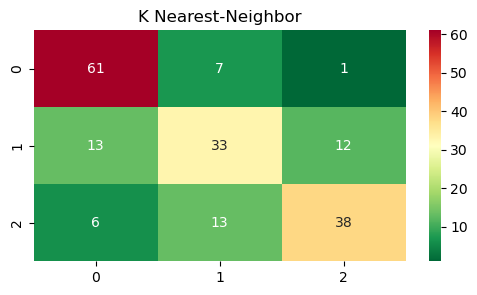

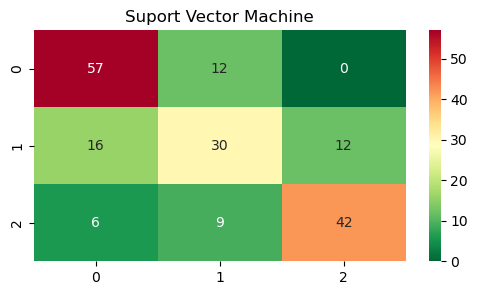

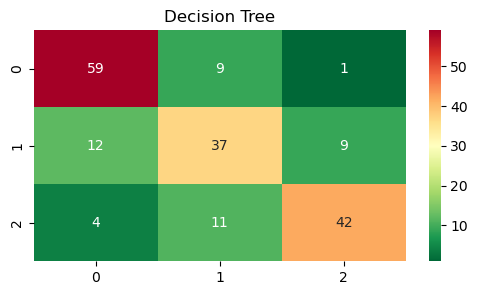

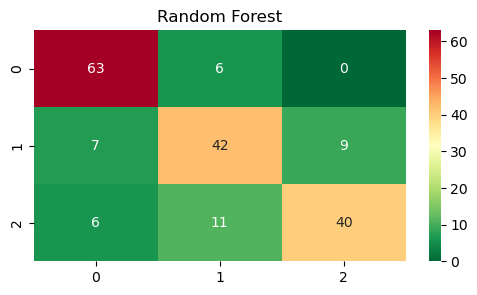

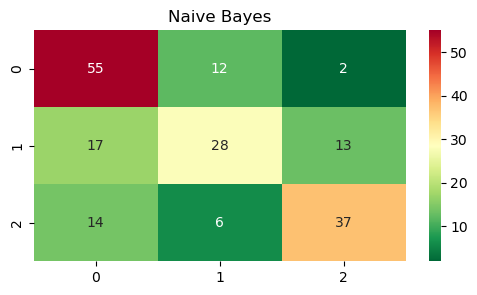

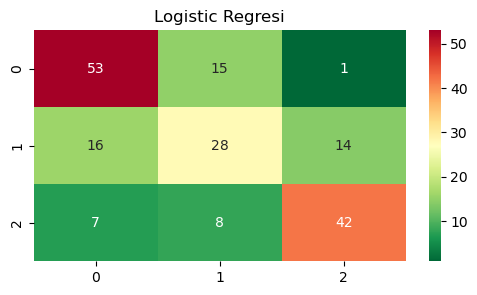

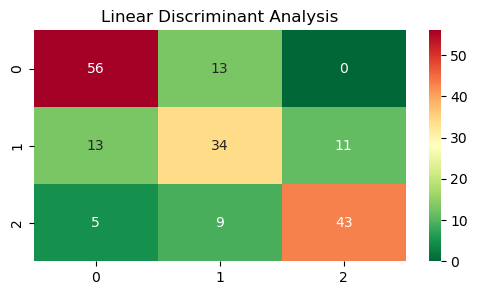

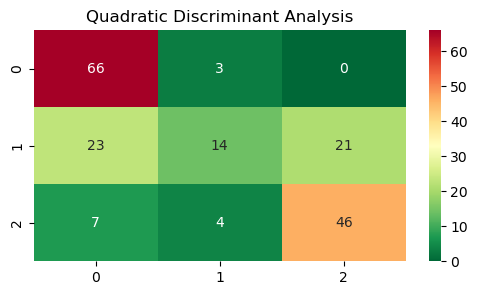

In [11]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,3))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, cmap="RdYlGn_r")
    plt.title(hasil.columns[i], fontsize=12)
    plt.show()

## 6. Ensambel Learning Classifier

In [12]:
# Algoritma supervised learning
estimators = [
    ('knn', KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1, metric='euclidean')),
    ('svm', SVC(kernel='rbf', random_state=1234, probability=True)),
    ('dt', DecisionTreeClassifier(criterion="gini", random_state=1234)),
    ('rf', RandomForestClassifier(criterion="gini", random_state=1234)),
    ('nb', GaussianNB()),
    ('lr', LogisticRegression(random_state=1234))
]

In [13]:
# Algoritma ensembel learning

# 1. Voting
voting = VotingClassifier(estimators=estimators, voting='soft').fit(x_train, y_train).predict(x_test)

# 2. Stacking
stacking = StackingClassifier(estimators=estimators, stack_method='predict').fit(x_train, y_train).predict(x_test)

In [14]:
# hasil prediksi ensembel
hasil = pd.DataFrame({
    "Voting": voting,
    "Stacking": stacking,
    "Target": y_test
})

In [15]:
for i in range(len(hasil.columns)-1):
    print(hasil.columns[i])
    print(np.round(accuracy_score(hasil["Target"], hasil.iloc[:,i:i+1]), 4))
    print(np.round(precision_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(recall_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print(np.round(f1_score(hasil["Target"], hasil.iloc[:,i:i+1], average="macro"), 4))
    print("------------------------- \n")

Voting
0.7554
0.7556
0.7441
0.7447
------------------------- 

Stacking
0.7772
0.773
0.7684
0.7688
------------------------- 



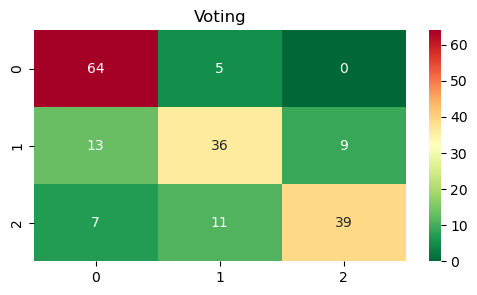

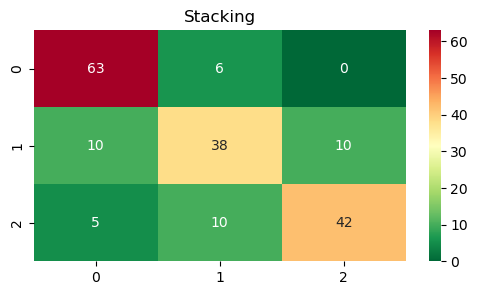

In [16]:
for i in range(len(hasil.columns)-1):
    fig,ax = plt.subplots(figsize=(6,3))
    sns.heatmap(confusion_matrix(hasil["Target"], hasil.iloc[:,i:i+1]),annot=True, cmap="RdYlGn_r")
    plt.title(hasil.columns[i], fontsize=12)
    plt.show()